In [2]:
# Libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
!pip install geopandas
!pip install geopandas matplotlib

In [6]:

# Read in the data 
# Load Data
accident = pd.read_csv('~/Accident_Information.csv', encoding = 'latin')
vehicle = pd.read_csv('~/Vehicle_Information.csv', encoding = 'latin')

In [7]:
df0 = pd.merge(vehicle, accident, how = 'inner', on = 'Accident_Index')
df0.head()

,Accident_Index,Age_Band_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Driver_IMD_Decile,Engine_Capacity_.CC.,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,Journey_Purpose_of_Driver,Junction_Location,...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year_y,InScotland
0,200501BS00002,36 - 45,3.0,Data missing or out of range,NaN,8268.0,None,None,Journey as part of work,Leaving roundabout,...,Metropolitan Police,Dry,Dual carriageway,None,30.0,17:36,Urban,Fine no high winds,2005,No
1,200501BS00003,26 - 35,5.0,Urban area,3.0,8300.0,Parked vehicle,None,Journey as part of work,Not at or within 20 metres of junction,...,Metropolitan Police,Dry,Single carriageway,None,30.0,00:15,Urban,Fine no high winds,2005,No
2,200501BS00004,46 - 55,4.0,Urban area,1.0,1769.0,None,None,Other/Not known (2005-10),Not at or within 20 metres of junction,...,Metropolitan Police,Dry,Single carriageway,None,30.0,10:35,Urban,Fine no high winds,2005,No
3,200501BS00005,46 - 55,10.0,Data missing or out of range,NaN,85.0,Kerb,None,Other/Not known (2005-10),Not at or within 20 metres of junction,...,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,21:13,Urban,Fine no high winds,2005,No
4,200501BS00006,46 - 55,1.0,Urban area,4.0,2976.0,None,None,Other/Not known (2005-10),Not at or within 20 metres of junction,...,Metropolitan Police,Wet or damp,Single carriageway,Oil or diesel,30.0,12:40,Urban,Raining no high winds,2005,No


In [8]:
df0.shape

(2058408, 57)

In [9]:
df0.dtypes

Accident_Index                                  object
Age_Band_of_Driver                              object
Age_of_Vehicle                                 float64
Driver_Home_Area_Type                           object
Driver_IMD_Decile                              float64
Engine_Capacity_.CC.                           float64
Hit_Object_in_Carriageway                       object
Hit_Object_off_Carriageway                      object
Journey_Purpose_of_Driver                       object
Junction_Location                               object
make                                            object
model                                           object
Propulsion_Code                                 object
Sex_of_Driver                                   object
Skidding_and_Overturning                        object
Towing_and_Articulation                         object
Vehicle_Leaving_Carriageway                     object
Vehicle_Location.Restricted_Lane               float64
Vehicle_Ma

In [11]:

# Calculate the number of categorical and the number of numerical
categorical = [var for var in df0.columns if df0[var].dtypes == 'object']
print(len(categorical))

numerical = [var for var in df0.columns if df0[var].dtypes != 'object']
print(len(numerical))

38
19


In [12]:
# We need to replace -1 with NA's since they are the missing values 
df0.replace(-1, np.nan, inplace=True)

In [13]:
# Check the missing values
df0.isnull().sum()

Accident_Index                                      0
Age_Band_of_Driver                                  0
Age_of_Vehicle                                 337962
Driver_Home_Area_Type                               0
Driver_IMD_Decile                              689290
Engine_Capacity_.CC.                           250317
Hit_Object_in_Carriageway                           0
Hit_Object_off_Carriageway                          0
Journey_Purpose_of_Driver                           0
Junction_Location                                   0
make                                           110845
model                                          299357
Propulsion_Code                                233598
Sex_of_Driver                                       0
Skidding_and_Overturning                            0
Towing_and_Articulation                             0
Vehicle_Leaving_Carriageway                         0
Vehicle_Location.Restricted_Lane                 1124
Vehicle_Manoeuvre           

In [14]:
# Dropping the irrelavant columns 
drop_cols = ['Driver_IMD_Decile','2nd_Road_Class']
df0 = df0.drop(drop_cols, axis=1)
print(df0.shape)
df0.head()

(2058408, 55)


,Accident_Index,Age_Band_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Engine_Capacity_.CC.,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,Journey_Purpose_of_Driver,Junction_Location,make,...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year_y,InScotland
0,200501BS00002,36 - 45,3.0,Data missing or out of range,8268.0,None,None,Journey as part of work,Leaving roundabout,DENNIS,...,Metropolitan Police,Dry,Dual carriageway,None,30.0,17:36,Urban,Fine no high winds,2005,No
1,200501BS00003,26 - 35,5.0,Urban area,8300.0,Parked vehicle,None,Journey as part of work,Not at or within 20 metres of junction,DENNIS,...,Metropolitan Police,Dry,Single carriageway,None,30.0,00:15,Urban,Fine no high winds,2005,No
2,200501BS00004,46 - 55,4.0,Urban area,1769.0,None,None,Other/Not known (2005-10),Not at or within 20 metres of junction,NISSAN,...,Metropolitan Police,Dry,Single carriageway,None,30.0,10:35,Urban,Fine no high winds,2005,No
3,200501BS00005,46 - 55,10.0,Data missing or out of range,85.0,Kerb,None,Other/Not known (2005-10),Not at or within 20 metres of junction,HONDA,...,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,21:13,Urban,Fine no high winds,2005,No
4,200501BS00006,46 - 55,1.0,Urban area,2976.0,None,None,Other/Not known (2005-10),Not at or within 20 metres of junction,AUDI,...,Metropolitan Police,Wet or damp,Single carriageway,Oil or diesel,30.0,12:40,Urban,Raining no high winds,2005,No


In [15]:

# Dropping the nas, since our dataset is huge we can drop NAs
df0 = df0.dropna()
df0.head()

,Accident_Index,Age_Band_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Engine_Capacity_.CC.,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,Journey_Purpose_of_Driver,Junction_Location,make,...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year_y,InScotland
2,200501BS00004,46 - 55,4.0,Urban area,1769.0,None,None,Other/Not known (2005-10),Not at or within 20 metres of junction,NISSAN,...,Metropolitan Police,Dry,Single carriageway,None,30.0,10:35,Urban,Fine no high winds,2005,No
4,200501BS00006,46 - 55,1.0,Urban area,2976.0,None,None,Other/Not known (2005-10),Not at or within 20 metres of junction,AUDI,...,Metropolitan Police,Wet or damp,Single carriageway,Oil or diesel,30.0,12:40,Urban,Raining no high winds,2005,No
5,200501BS00006,26 - 35,2.0,Urban area,124.0,None,None,Other/Not known (2005-10),Not at or within 20 metres of junction,PIAGGIO,...,Metropolitan Police,Wet or damp,Single carriageway,Oil or diesel,30.0,12:40,Urban,Raining no high winds,2005,No
7,200501BS00007,36 - 45,4.0,Urban area,4266.0,None,None,Other/Not known (2005-10),Approaching junction or waiting/parked at junc...,MERCEDES,...,Metropolitan Police,Dry,Single carriageway,None,30.0,20:40,Urban,Fine no high winds,2005,No
8,200501BS00009,66 - 75,16.0,Urban area,5343.0,None,None,Other/Not known (2005-10),Not at or within 20 metres of junction,JAGUAR,...,Metropolitan Police,Dry,Dual carriageway,None,30.0,17:35,Urban,Fine no high winds,2005,No


In [16]:
# Check the missing values
df0.isnull().sum()

Accident_Index                                 0
Age_Band_of_Driver                             0
Age_of_Vehicle                                 0
Driver_Home_Area_Type                          0
Engine_Capacity_.CC.                           0
Hit_Object_in_Carriageway                      0
Hit_Object_off_Carriageway                     0
Journey_Purpose_of_Driver                      0
Junction_Location                              0
make                                           0
model                                          0
Propulsion_Code                                0
Sex_of_Driver                                  0
Skidding_and_Overturning                       0
Towing_and_Articulation                        0
Vehicle_Leaving_Carriageway                    0
Vehicle_Location.Restricted_Lane               0
Vehicle_Manoeuvre                              0
Vehicle_Reference                              0
Vehicle_Type                                   0
Was_Vehicle_Left_Han

In [17]:
# Converting the date column and the time column 
df0['DateTime'] = df0['Date'] + ' ' + df0['Time']
df0['DateTime'] = pd.to_datetime(df0['DateTime'])
df0['Date'] = pd.to_datetime(df0['Date'])

In [18]:
# Slice first and second string from time column
# for this plot we will use accident dataset
accident['Date']= pd.to_datetime(accident['Date'], format="%Y-%m-%d")
 
plot_1 = accident
plot_1['Hour'] = accident['Time'].str[0:2] # getting the hour 

# Convert new column to numeric datetype
plot_1['Hour'] = pd.to_numeric(plot_1['Hour'])

# Drop null values in our new column
plot_1 = plot_1.dropna(subset=['Hour'])

# Cast to integer values
plot_1['Hour'] = plot_1['Hour'].astype('int')
plot_1

<ipython-input-18-f37fdffac5ca>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_1['Hour'] = plot_1['Hour'].astype('int')


,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland,Hour
0,200501BS00001,A,3218.0,NaN,0.0,Serious,None,2005-01-04,Tuesday,1.0,...,Wet or damp,Single carriageway,None,30.0,17:42,Urban,Raining no high winds,2005,No,17
1,200501BS00002,B,450.0,C,0.0,Slight,None,2005-01-05,Wednesday,1.0,...,Dry,Dual carriageway,None,30.0,17:36,Urban,Fine no high winds,2005,No,17
2,200501BS00003,C,0.0,NaN,0.0,Slight,None,2005-01-06,Thursday,1.0,...,Dry,Single carriageway,None,30.0,00:15,Urban,Fine no high winds,2005,No,0
3,200501BS00004,A,3220.0,NaN,0.0,Slight,None,2005-01-07,Friday,1.0,...,Dry,Single carriageway,None,30.0,10:35,Urban,Fine no high winds,2005,No,10
4,200501BS00005,Unclassified,0.0,NaN,0.0,Slight,None,2005-01-10,Monday,1.0,...,Wet or damp,Single carriageway,None,30.0,21:13,Urban,Fine no high winds,2005,No,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2047251,2017984121017,A(M),74.0,NaN,0.0,Slight,None,2017-12-17,Sunday,1.0,...,Frost or ice,Dual carriageway,None,70.0,11:30,Rural,Other,2017,Yes,11
2047252,2017984121217,C,69.0,NaN,0.0,Slight,Pedestrian in carriageway - not injured,2017-12-15,Friday,2.0,...,Dry,Single carriageway,None,20.0,13:00,Urban,Fine no high winds,2017,Yes,13
2047253,2017984121717,A(M),74.0,Unclassified,0.0,Slight,None,2017-12-18,Monday,1.0,...,Wet or damp,Dual carriageway,None,70.0,13:30,Rural,Fine no high winds,2017,Yes,13
2047254,2017984122317,A,708.0,NaN,0.0,Slight,None,2017-07-18,Tuesday,1.0,...,Dry,Single carriageway,None,60.0,18:00,Rural,Fine no high winds,2017,Yes,18


In [19]:

# Define a function to group the hour into daytime groups
def when_was_it(hour):
    if hour >= 5 and hour < 10:
        return "morning rush (5-10)"
    elif hour >= 10 and hour < 15:
        return "office hours (10-15)"
    elif hour >= 15 and hour < 19:
        return "afternoon rush (15-19)"
    elif hour >= 19 and hour < 23:
        return "evening (19-23)"
    else:
        return "night (23-5)"

In [20]:
# Apply thus function to our temporary hour column
plot_1['Daytime'] = plot_1['Hour'].apply(when_was_it)
plot_1[['Time', 'Hour', 'Daytime']].head()

<ipython-input-20-a033462d0eb4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_1['Daytime'] = plot_1['Hour'].apply(when_was_it)


,Time,Hour,Daytime
0,17:42,17,afternoon rush (15-19)
1,17:36,17,afternoon rush (15-19)
2,00:15,0,night (23-5)
3,10:35,10,office hours (10-15)
4,21:13,21,evening (19-23)


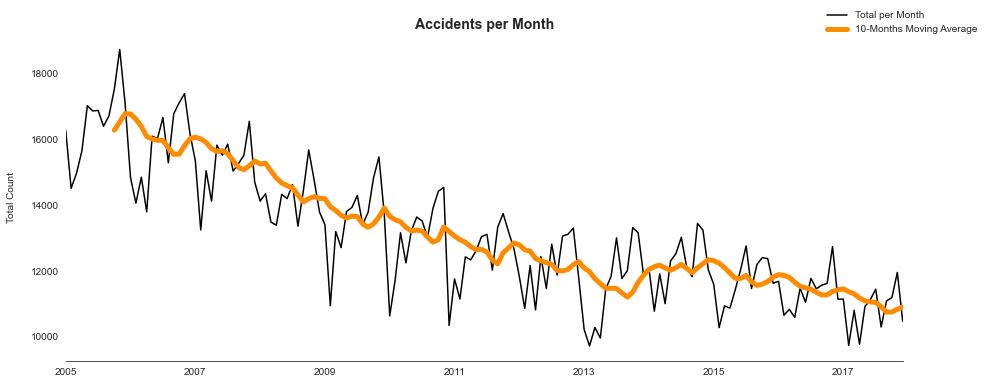

In [21]:
# Prepare plot
sns.set_style('white')
fig, ax = plt.subplots(figsize=(15,6))

# Plot
plot_1.set_index('Date').resample('M').size().plot(label='Total per Month', color='black', ax=ax)
plot_1.set_index('Date').resample('M').size().rolling(window=10).mean()\
                           .plot(color='darkorange', linewidth=5, label='10-Months Moving Average', ax=ax)

ax.set_title('Accidents per Month', fontsize=14, fontweight='bold')
ax.set(ylabel='Total Count\n', xlabel='')
ax.legend(bbox_to_anchor=(1.1, 1.1), frameon=False)

# Remove all spines
sns.despine(ax=ax, top=True, right=True, left=True, bottom=False);

In [22]:
# Count the accidents per day and by weather
plot1 = plot_1.groupby(['Accident_Severity', 'Date']).size()
plot1 = pd.DataFrame(plot1)

# Rename columns
plot1.columns = [*plot1.columns[:-1], 'CountAccidents']
plot1.head(45)

TotalCases=plot1.max(level=0)['CountAccidents'].reset_index().set_index('Accident_Severity')
TotalCases

# Making each severity case
FatalFirstCase=plot1.loc['Fatal']['CountAccidents'].reset_index().set_index('Date')
Seriousfirstcase = plot1.loc['Serious']['CountAccidents'].reset_index().set_index('Date')
Slightfirstcase = plot1.loc['Slight']['CountAccidents'].reset_index().set_index('Date')

# Making each countrywise case
FatalGrowth=FatalFirstCase[FatalFirstCase.ne(0)].dropna().reset_index()
SeriousGrowth=Seriousfirstcase[Seriousfirstcase.ne(0)].dropna().reset_index()
SlightGrowth=Slightfirstcase[Slightfirstcase.ne(0)].dropna().reset_index()

In [31]:
## Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

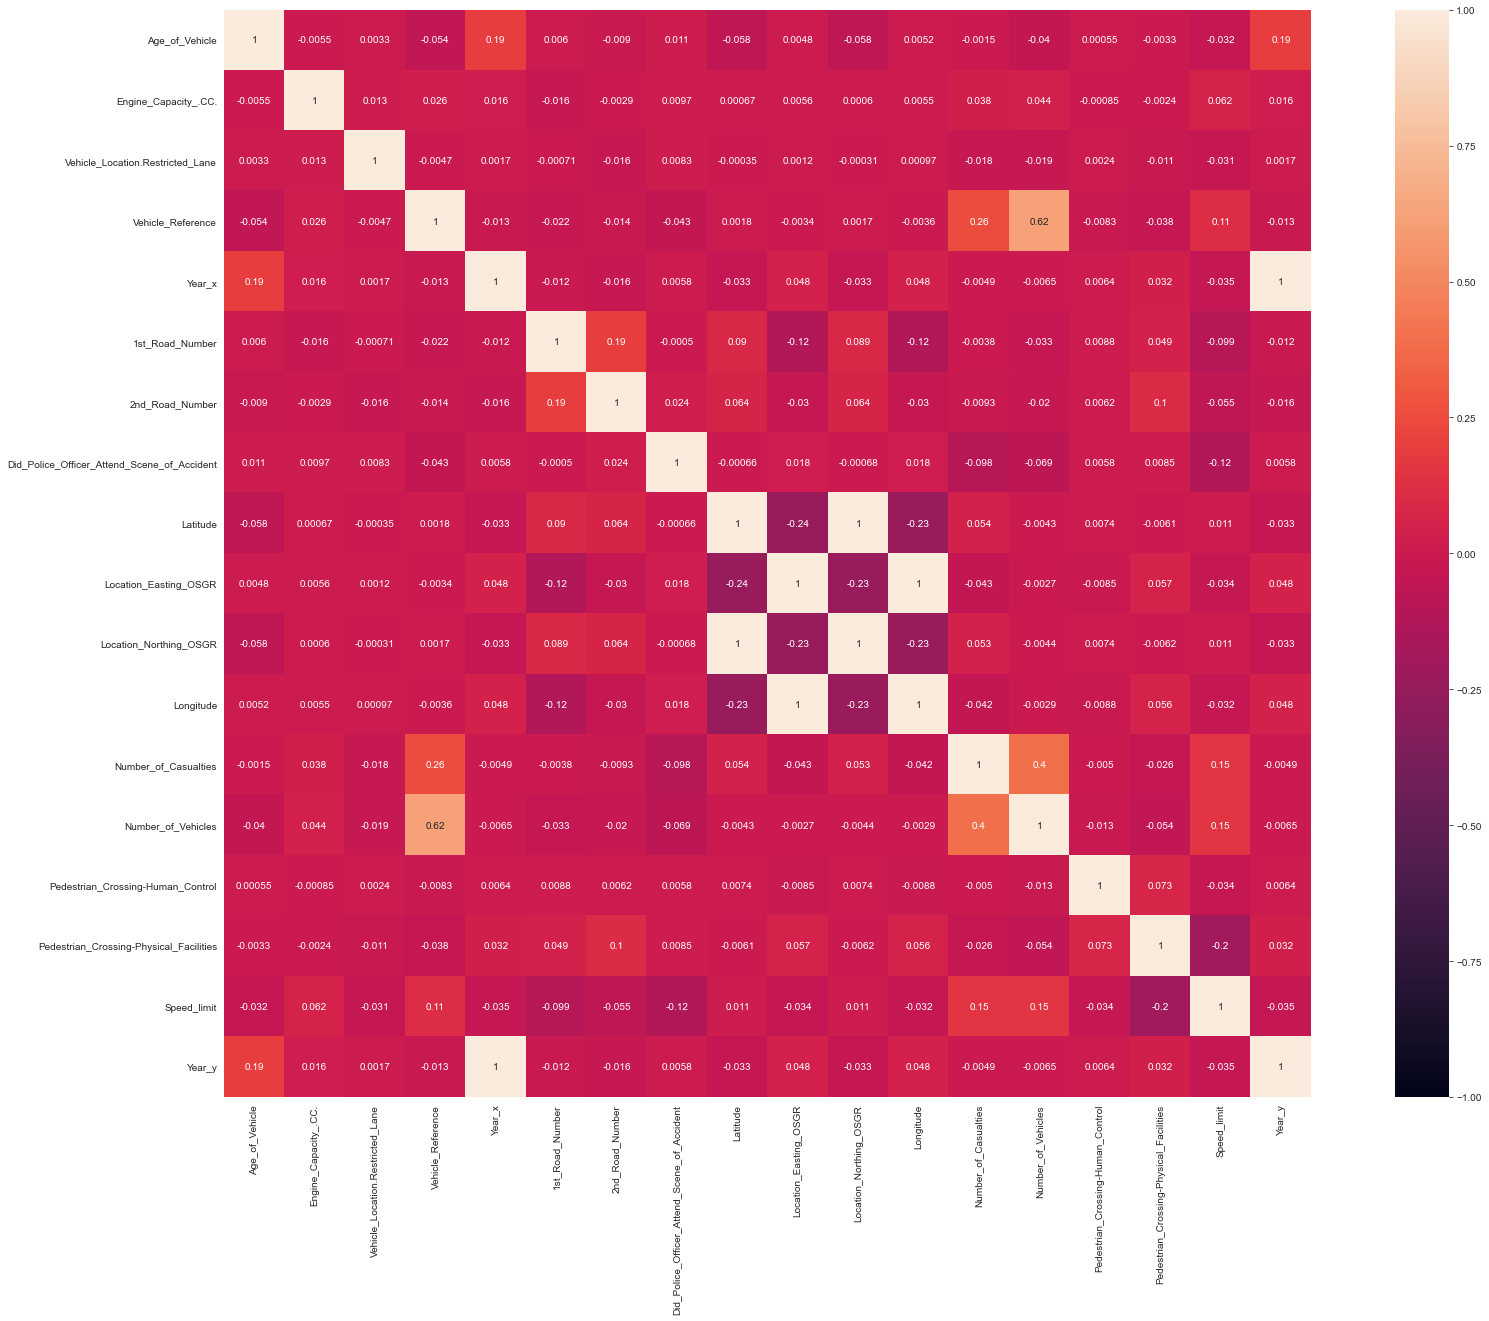

In [25]:
# Heat map
import seaborn as sns
tmp_data = df0.set_index('Accident_Index')
# tmp_data = main_df.drop(columns={'driver_imd_decile','vehicle_imd_decile'})
corrmat = tmp_data.corr()
f, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(corrmat, 
            vmin=-1,
            vmax=1, 
            square=True,
            annot=True)

# ax = sns.pairplot(df, size)
plt.show()

In [29]:
# Age and gender of the drivers
drivers = df0.groupby(['Age_Band_of_Driver', 'Sex_of_Driver']).size().reset_index()

# Drop the values that have no value
drivers.drop(drivers[(drivers['Age_Band_of_Driver'] == 'Data missing or out of range') | \
                     (drivers['Age_Band_of_Driver'] == '0 - 5') | \
                     (drivers['Age_Band_of_Driver'] == '6 - 10') | \
                     (drivers['Age_Band_of_Driver'] == '11 - 15') |
                     (drivers['Sex_of_Driver'] == 'Not known') | \
                     (drivers['Sex_of_Driver'] == 'Data missing or out of range')]\
                     .index, axis=0, inplace=True)
# Rename the columns
drivers.columns = ['Age_Band_of_Driver', 'Sex_of_Driver', 'Count']
drivers

,Age_Band_of_Driver,Sex_of_Driver,Count
4,16 - 20,Female,41430
5,16 - 20,Male,81742
8,21 - 25,Female,62261
9,21 - 25,Male,106500
12,26 - 35,Female,107977
13,26 - 35,Male,193168
15,36 - 45,Female,101713
16,36 - 45,Male,175954
19,46 - 55,Female,77290
20,46 - 55,Male,141270


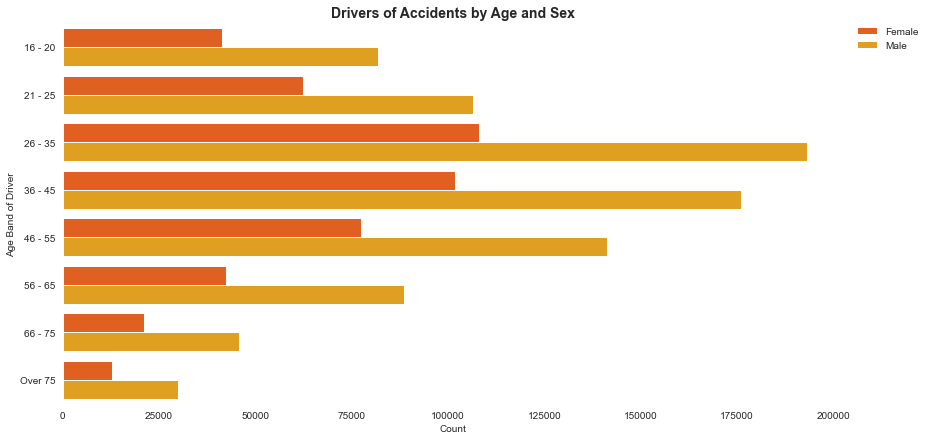

In [30]:
fig, ax = plt.subplots(figsize=(14, 7))
sns.barplot(y='Age_Band_of_Driver', x='Count', hue='Sex_of_Driver', data=drivers, palette='autumn')
ax.set_title('Drivers of Accidents by Age and Sex', fontsize=14, fontweight='bold')
ax.set(xlabel='Count', ylabel='Age Band of Driver')
ax.legend(bbox_to_anchor=(1.1, 1.), borderaxespad=0., frameon=False)

# Remove all spines
sns.despine(top=True, right=True, left=True, bottom=True);

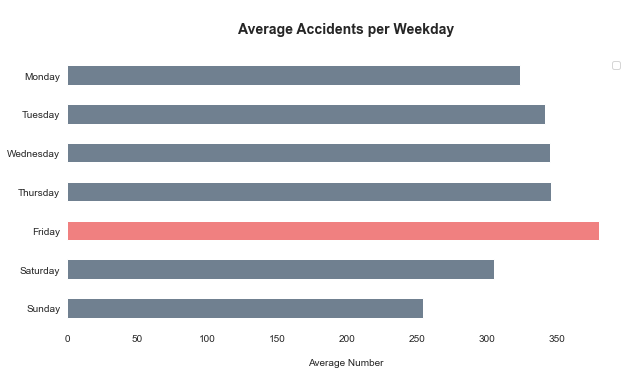

In [38]:
weekday_counts = pd.DataFrame(df0.set_index('Date').resample('1d')['Accident_Index'].size().reset_index())
weekday_counts.columns = ['Date', 'Count']

weekday = weekday_counts['Date'].dt.day_name()

weekday_averages = pd.DataFrame(weekday_counts.groupby(weekday)['Count'].mean().reset_index())
weekday_averages.columns = ['Weekday', 'Average_Accidents']
weekday_averages.set_index('Weekday', inplace=True)

days = ['Sunday', 'Saturday', 'Friday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday']

# Prepare plot
sns.set_style('white')
fig, ax = plt.subplots(figsize=(10,5))
colors=['slategrey', 'slategrey', 'lightcoral', 'slategrey', 
        'slategrey', 'slategrey', 'slategrey']

# Plot
weekday_averages.reindex(days).plot(kind='barh', ax=ax, color=[colors])
ax.set_title('\nAverage Accidents per Weekday\n', fontsize=14, fontweight='bold')
ax.set(xlabel='\nAverage Number', ylabel='')
ax.legend('')

# Remove all spines
sns.despine(ax=ax, top=True, right=True, left=True, bottom=True);

In [39]:
weekday = df0['Date'].dt.day_name()
year= df0['Date'].dt.year
accident_table = df0.groupby([year, weekday]).size()
accident_table = accident_table.rename_axis(['Year', 'Weekday'])\
                               .unstack('Weekday')\
                               .reindex(columns=days)
accident_table

Weekday,Sunday,Saturday,Friday,Thursday,Wednesday,Tuesday,Monday
Year,,,,,,,
2005,7903,9488,11624,10608,10614,10299,9796
2006,8189,9800,12606,10703,11142,10722,9923
2007,9076,10476,12824,11673,11716,11572,11233
2008,8993,10673,13030,11725,12315,12383,11344
2009,15041,18555,22363,20016,20502,20531,18648
2010,14767,18470,22584,19998,19887,20133,19414
2011,14974,18171,22782,21175,20612,19701,19060
2012,14566,17375,21583,20187,20066,19516,18836
2013,14250,17245,21923,19993,19176,19759,18381


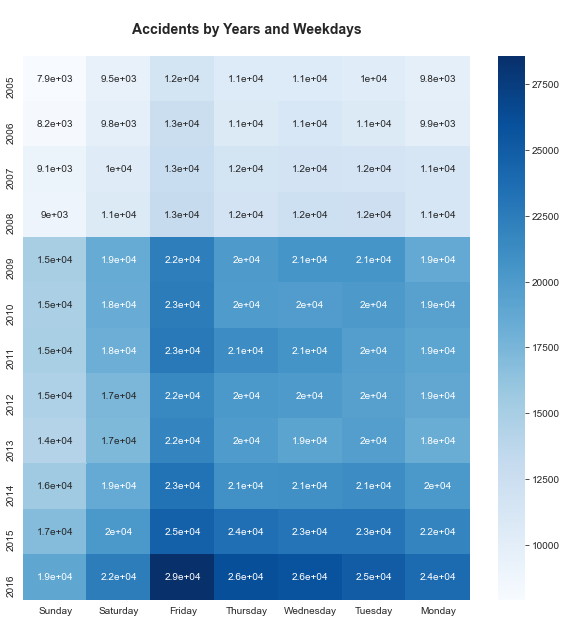

In [40]:
plt.figure(figsize=(10,10))
sns.heatmap(accident_table, cmap='Blues',annot=True)
plt.title('\nAccidents by Years and Weekdays\n', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.ylabel('');

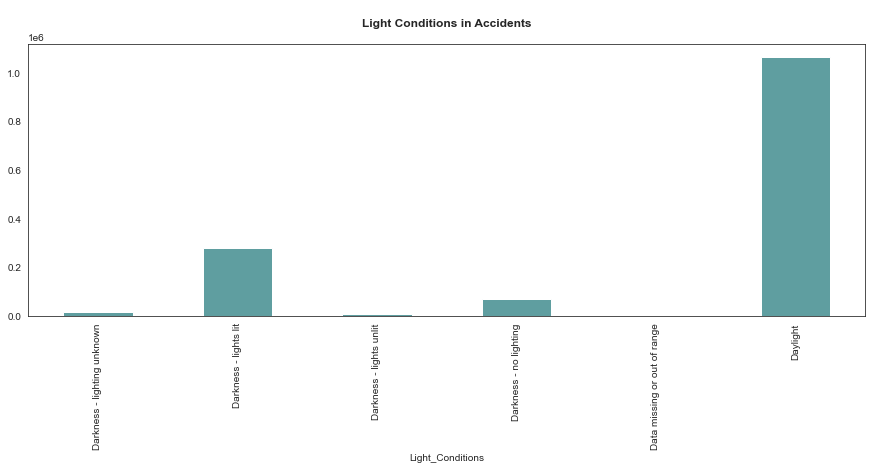

In [41]:
# It's so cool, the most accidents happened in the Daylight! I thought it might be at night.
df0.groupby(['Light_Conditions']).size().plot.bar(figsize=(15,5), color='cadetblue')
plt.title('\nLight Conditions in Accidents\n', fontweight='bold')
plt.show()

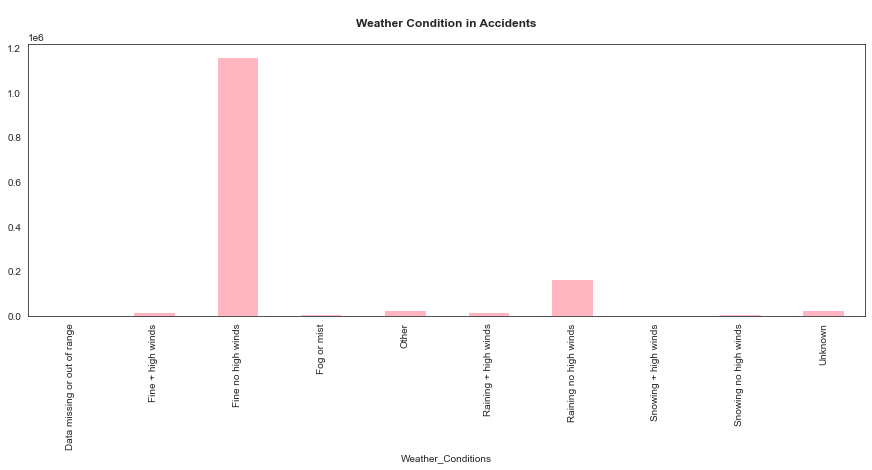

In [42]:

# Weather condition in accidents
df0.groupby(['Weather_Conditions']).size().plot.bar(figsize=(15,5), color='lightpink')
plt.title('\nWeather Condition in Accidents\n', fontweight='bold')
plt.show()

In [43]:
# Create a little dictionary to later look up the groups I will create
daytime_groups = {1: 'Morning (5-10)', 
                  2: 'Office Hours (10-15)', 
                  3: 'Afternoon Rush (15-19)', 
                  4: 'Evening (19-23)', 
                  5: 'Night(23-5)'}

In [44]:

# Slice first and second string from time column
df0['Hour'] = df0['Time'].str[0:2]

# Convert new column to numeric datetype
df0['Hour'] = pd.to_numeric(df0['Hour'])

# Drop null values in our new column
df0 = df0.dropna(subset=['Hour'])

# Cast to integer values
df0['Hour'] = df0['Hour'].astype('int')

# Define a function that turns the hours into daytime groups
def when_was_it(hour):
    if hour >= 5 and hour < 10:
        return "1"
    elif hour >= 10 and hour < 15:
        return "2"
    elif hour >= 15 and hour < 19:
        return "3"
    elif hour >= 19 and hour < 23:
        return "4"
    else:
        return "5"
    
# Apply this function to our temporary hour column
df0['Daytime'] = df0['Hour'].apply(when_was_it)

# Drop old time column and temporary hour column
df0 = df0.drop(columns=['Time', 'Hour'])

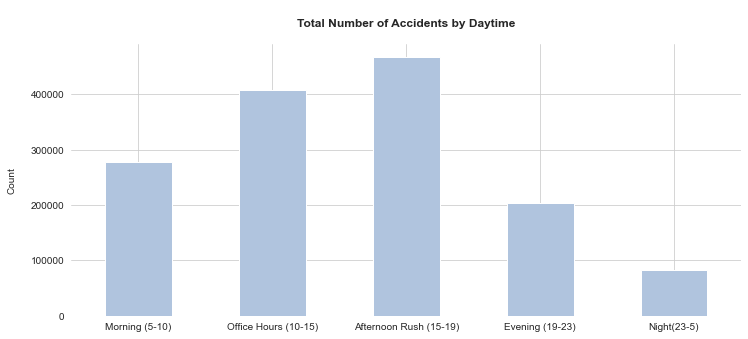

In [45]:
# Define labels by accessing look up dictionary above
labels = tuple(daytime_groups.values())

# Plot total no. of accidents by daytime
df0.groupby('Daytime').size().plot(kind='bar', color='lightsteelblue', figsize=(12,5), grid=True)
plt.xticks(np.arange(5), labels, rotation='horizontal')
plt.xlabel(''), plt.ylabel('Count\n')
plt.title('\nTotal Number of Accidents by Daytime\n', fontweight='bold')
sns.despine(top=True, right=True, left=True, bottom=True);

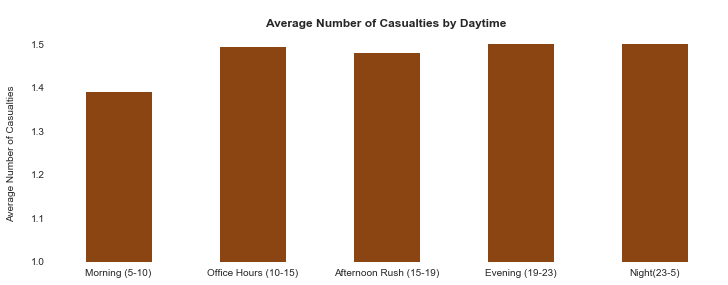

In [46]:
# Plot average no. of casualties by daytime
df0.groupby('Daytime')['Number_of_Casualties'].mean().plot(kind='bar', color='saddlebrown', 
                                                                 figsize=(12,4), grid=False)
plt.xticks(np.arange(5), labels, rotation='horizontal')
plt.ylim((1,1.5))
plt.xlabel(''), plt.ylabel('Average Number of Casualties\n')
plt.title('\nAverage Number of Casualties by Daytime\n', fontweight='bold')
sns.despine(top=True, right=True, left=True, bottom=True);

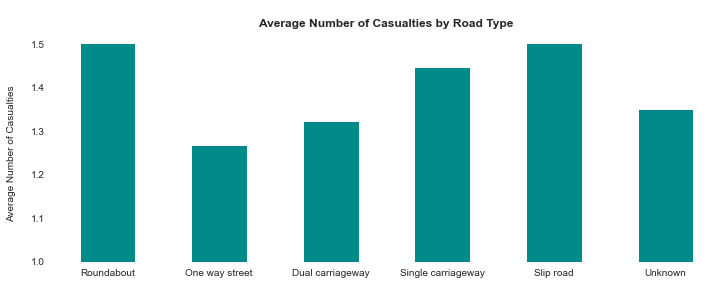

In [47]:
# Check the road type
df0.groupby('Road_Type')['Number_of_Casualties'].mean().plot(kind='bar', color='darkcyan', 
                                                            figsize=(12,4), grid=False)
plt.xticks(np.arange(6), 
           ['Roundabout', 'One way street', 'Dual carriageway', 'Single carriageway', 'Slip road', 'Unknown'], 
           rotation='horizontal')
plt.ylim((1,1.5))
plt.xlabel(''), plt.ylabel('Average Number of Casualties\n')
plt.title('\nAverage Number of Casualties by Road Type\n', fontweight='bold')
sns.despine(top=True, right=True, left=True, bottom=True);

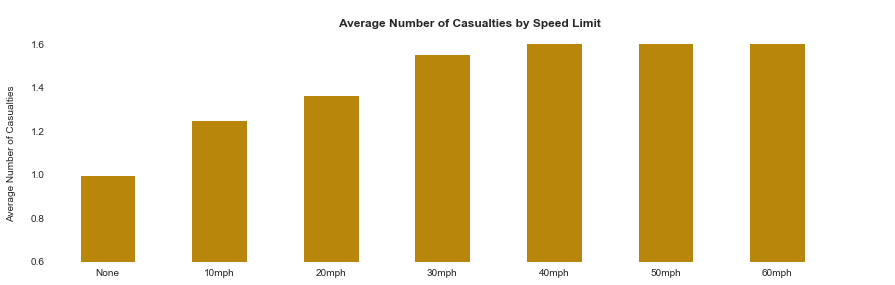

In [48]:
# Check the speed limit
df0.groupby('Speed_limit')['Number_of_Casualties'].mean().plot(kind='bar', color='darkgoldenrod', 
                                                              figsize=(15,4), grid=False)
plt.xticks(np.arange(8), 
           ['None', '10mph', '20mph', '30mph', '40mph', '50mph', '60mph'], 
           rotation='horizontal')
plt.ylim((0.6,1.6))
plt.xlabel(''), plt.ylabel('Average Number of Casualties\n')
plt.title('\nAverage Number of Casualties by Speed Limit\n', fontweight='bold')
sns.despine(top=True, right=True, left=True, bottom=True);

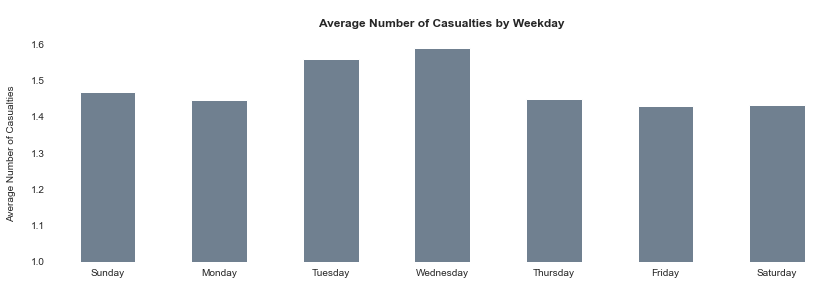

In [49]:
# Check the daytime
df0.groupby('Day_of_Week')['Number_of_Casualties'].mean().plot(kind='bar', color='slategrey', 
                                                              figsize=(14,4), grid=False)
plt.xticks(np.arange(7), 
           ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], 
           rotation='horizontal')
plt.ylim((1.0,1.6))
plt.xlabel(''), plt.ylabel('Average Number of Casualties\n')
plt.title('\nAverage Number of Casualties by Weekday\n', fontweight='bold')
sns.despine(top=True, right=True, left=True, bottom=True);

In [50]:
# Count the accidents per day and by district
Count1 = df0.groupby(['Day_of_Week', 'Local_Authority_(District)','Accident_Severity']).size()
Count1 = pd.DataFrame(Count1)
Count1.head()
# Rename columns
Count1.columns = [*Count1.columns[:-1], 'CountAccidents']
Count1.head(20)

CountAccidents
Day_of_Week Local_Authority_(District) Accident_Severity                
Friday      Adur                       Fatal                           3
                                       Serious                        27
                                       Slight                        224
            Allerdale                  Fatal                           6
                                       Serious                        63
                                       Slight                        408
            Alnwick                    Slight                         44
            Amber Valley               Fatal                           1
                                       Serious                        63
                                       Slight                        426
            Arun                       Fatal                           4
                                       Serious                        90
                                       Slight                        444
            Ashfield                   Fatal                           2
                                       Serious                        86
                                       Slight                        530
            Ashford                    Fatal                          10
                                       Serious                        50
                                       Slight                        511
            Aylesbury Vale             Fatal                          15

In [51]:
# Count the accidents per day and by weather and road surf condition
Count2 = df0.groupby(['Date', 'Weather_Conditions', 'Road_Surface_Conditions','Accident_Severity']).size()
Count2 = pd.DataFrame(Count2)
Count2.head()
# Rename the columns
Count2.columns = [*Count2.columns[:-1], 'CountAccidents']
Count2.head(20)

CountAccidents
Date       Weather_Conditions    Road_Surface_Conditions Accident_Severity                
2005-01-01 Fine + high winds     Dry                     Serious                         1
                                 Frost or ice            Slight                          1
                                 Wet or damp             Slight                          3
           Fine no high winds    Dry                     Fatal                           2
                                                         Serious                         2
                                                         Slight                         23
                                 Wet or damp             Fatal                           2
                                                         Serious                         6
                                                         Slight                         22
           Other                 Dry                     Slight                          1
                                 Wet or damp             Fatal                           1
                                                         Slight                          2
           Raining + high winds  Wet or damp             Slight                         12
           Raining no high winds Wet or damp             Serious                         2
                                                         Slight                         14
           Unknown               Dry                     Slight                          2
2005-01-02 Fine + high winds     Dry                     Slight                          1
                                 Wet or damp             Slight                          2
           Fine no high winds    Dry                     Serious                        10
                                                         Slight                         59

In [52]:
# Count the accidents per day and by age of drive, light conditions and road type 
Count3 = df0.groupby(['Date', 'Age_Band_of_Driver', 'Sex_of_Driver','Light_Conditions','Road_Type','Vehicle_Type','Accident_Severity']).size()
Count3 = pd.DataFrame(Count3)
Count3.head()
# Rename the columns
Count3.columns = [*Count3.columns[:-1], 'CountAccidents']
Count3.head(25)

CountAccidents
Date       Age_Band_of_Driver Sex_of_Driver Light_Conditions        Road_Type          Vehicle_Type                        Accident_Severity                
2005-01-01 16 - 20            Female        Darkness - lights lit   Single carriageway Car                                 Slight                          2
                              Male          Darkness - lights lit   Single carriageway Car                                 Slight                          1
                                            Darkness - no lighting  Single carriageway Car                                 Fatal                           1
                                                                                                                           Slight                          3
                                            Daylight                Single carriageway Car                                 Serious                         1
                                                                                                                           Slight                          3
           21 - 25            Female        Darkness - lights lit   Single carriageway Car                                 Slight                          1
                                            Daylight                Dual carriageway   Car                                 Slight                          1
                              Male          Darkness - lights lit   Single carriageway Car                                 Slight                          5
                                            Darkness - lights unlit Single carriageway Car                                 Slight                          1
                                            Darkness - no lighting  Single carriageway Van / Goods 3.5 tonnes mgw or under Serious                         1
                                            Daylight                Single carriageway Car                                 Slight                          2
           26 - 35            Female        Darkness - lights lit   Single carriageway Car                                 Slight                          2
                                            Daylight                Dual carriageway   Car                                 Slight                          1
                                                                    Single carriageway Car                                 Slight                          3
                              Male          Darkness - lights lit   Dual carriageway   Car                                 Slight                          2
                                                                    Roundabout         Car                                 Slight                          1
                                                                    Single carriageway Car                                 Fatal                           1
                                                                                                                           Slight                          5
                                                                                       Motorcycle 125cc and under          Slight                          1
                                                                                       Van / Goods 3.5 tonnes mgw or under Slight                          1
                                            Darkness - no lighting  Dual carriageway   Car                                 Serious                         1
                                                                                                                           Slight                          1
                                                                    Single carriageway Car                                 Serious                         1
                                                            

# Modeling

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier

In [55]:
import numpy
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier

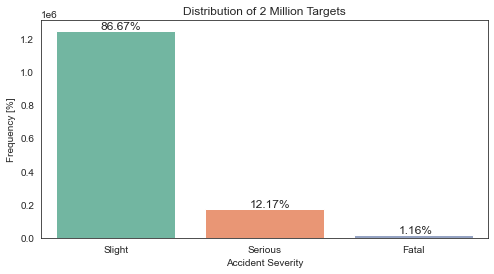

In [56]:

# Sample the data, we found the target variable is imbalanced, so we decided to reduce rows with slight accident severity 

ax = sns.countplot(x = df0.Accident_Severity ,palette="Set2")
sns.set(font_scale=1)
ax.set_xlabel(' ')
ax.set_ylabel(' ')
fig = plt.gcf()
fig.set_size_inches(8,4)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/len(df0.Accident_Severity)), (p.get_x()+ 0.3, p.get_height()+10000))

plt.title('Distribution of 2 Million Targets',)
plt.xlabel('Accident Severity')
plt.ylabel('Frequency [%]')
plt.show()

In [57]:
# To find out how many observations for Serious and Fatal
sub_data1 = df0[(df0['Accident_Severity'] == 'Serious') | (df0['Accident_Severity'] == 'Fatal')]
sub_data1.shape

(191712, 56)

In [58]:
# Since the sum of Serious and Fatal is 191554 rows, we sampled the Slight data to match the number
sub_data2 = df0[df0['Accident_Severity'] == 'Slight']
sub_data2 = sub_data2.sample(n = 191554)
sub_data2.shape

(191554, 56)

In [59]:
# Merge data for modeling
frames = [sub_data1, sub_data2]
Model_df = pd.concat(frames)
print(Model_df.shape)
Model_df.head()

(383266, 56)


,Accident_Index,Age_Band_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Engine_Capacity_.CC.,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,Journey_Purpose_of_Driver,Junction_Location,make,...,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Urban_or_Rural_Area,Weather_Conditions,Year_y,InScotland,DateTime,Daytime
18,200501BS00022,26 - 35,1.0,Urban area,1997.0,None,None,Other/Not known (2005-10),Approaching junction or waiting/parked at junc...,HONDA,...,Dry,Single carriageway,None,30.0,Urban,Fine no high winds,2005,No,2005-01-08 03:00:00,5
39,200501BS70029,21 - 25,7.0,Urban area,599.0,None,None,Other/Not known (2005-10),Not at or within 20 metres of junction,KAWASAKI,...,Dry,Single carriageway,None,30.0,Urban,Fine no high winds,2005,No,2005-02-15 18:15:00,3
56,200501BS70066,26 - 35,2.0,Urban area,49.0,Open door of vehicle,None,Other/Not known (2005-10),Not at or within 20 metres of junction,PIAGGIO,...,Wet or damp,Single carriageway,None,30.0,Urban,Raining no high winds,2005,No,2005-03-01 19:15:00,4
76,200501BS70096,26 - 35,2.0,Urban area,124.0,None,None,Other/Not known (2005-10),Not at or within 20 metres of junction,SUZUKI,...,Dry,Single carriageway,None,30.0,Urban,Fine no high winds,2005,No,2005-03-16 20:20:00,4
118,200501BS70207,46 - 55,4.0,Urban area,2664.0,None,None,Other/Not known (2005-10),Not at or within 20 metres of junction,LONDON TAXIS INT,...,Dry,Single carriageway,None,30.0,Urban,Fine no high winds,2005,No,2005-05-08 19:15:00,4


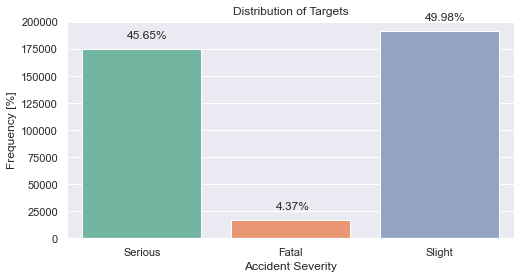

In [60]:
# We can see the Serious and Fatal data were oversampled 
ax = sns.countplot(x = Model_df.Accident_Severity ,palette="Set2")
sns.set(font_scale=1)
ax.set_xlabel(' ')
ax.set_ylabel(' ')
fig = plt.gcf()
fig.set_size_inches(8,4)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/len(Model_df.Accident_Severity)), (p.get_x()+ 0.3, p.get_height()+10000))

plt.title('Distribution of Targets',)
plt.xlabel('Accident Severity')
plt.ylabel('Frequency [%]')
plt.show()

In [68]:
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn import datasets
from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence
from sklearn.inspection import permutation_importance

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [72]:
# Recode some variables 
Model_df['Sex_of_Driver_Code'] = np.where(Model_df['Sex_of_Driver']=='Female',0,1)

Model_df['Accident_Severity_Flag'] = np.where(Model_df['Accident_Severity']=='Slight',0,1)

Model_df['InScotland_Code'] = np.where(Model_df['InScotland']=='Yes',1,0)
# Subset X data
X = Model_df[['Age_Band_of_Driver','Age_of_Vehicle','Engine_Capacity_.CC.',
                      'Sex_of_Driver_Code','Vehicle_Location.Restricted_Lane','Vehicle_Reference','1st_Road_Number',
                      '2nd_Road_Number','Vehicle_Location.Restricted_Lane','Vehicle_Reference',
                      'Did_Police_Officer_Attend_Scene_of_Accident','Number_of_Casualties','Number_of_Vehicles',	
         'Pedestrian_Crossing-Human_Control',	'Pedestrian_Crossing-Physical_Facilities','Speed_limit']]

# Recode the Age_Band_of_Driver variable
X = X.replace(to_replace ='0 - 5', value =1) 
X = X.replace(to_replace ='6 - 10', value =2) 
X = X.replace(to_replace ='11 - 15', value =3) 
X = X.replace(to_replace ='16 - 20', value =4) 
X = X.replace(to_replace ='21 - 25', value =5) 
X = X.replace(to_replace ='26 - 35', value =6) 
X = X.replace(to_replace ='36 - 45', value =7) 
X = X.replace(to_replace ='46 - 55', value =8) 
X = X.replace(to_replace ='56 - 65', value =9) 
X = X.replace(to_replace ='66 - 75', value =10) 
X = X.replace(to_replace ='Over 75', value =11) 
X = X.replace(to_replace ='Data missing or out of range', value =0) 

# Subset Y data
Y = Model_df['Accident_Severity_Flag']


X = X.dropna()
Y = Y.dropna()
print(X.shape)
print(Y.shape)

(7000, 16)
(7000,)


In [73]:
# Because our columns are most categorical, we did not do the ploynomials but added an interaction term
X['Age_of_Vehicle*Speed_limit'] = X['Age_of_Vehicle'] * X['Speed_limit']

In [74]:
# Data Standardization
from scipy.stats import zscore
numeric_cols = X.select_dtypes(include=[np.number]).columns
numeric_cols
# Apply zscore standardization
zData = X[numeric_cols].apply(zscore)
# Check out summary stats
zData.describe()

# Since most category columns in our dataset are recoded to codes, it is meaningless to do data standization to these code columns.
# So we chose not to standardize our dataset.

,Age_Band_of_Driver,Age_of_Vehicle,Engine_Capacity_.CC.,Sex_of_Driver_Code,Vehicle_Location.Restricted_Lane,Vehicle_Location.Restricted_Lane,Vehicle_Reference,Vehicle_Reference,1st_Road_Number,2nd_Road_Number,...,Vehicle_Location.Restricted_Lane,Vehicle_Reference,Vehicle_Reference,Did_Police_Officer_Attend_Scene_of_Accident,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Speed_limit,Age_of_Vehicle*Speed_limit
count,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,...,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03
mean,8.758589e-16,-7.555464e-17,-3.862882e-17,4.436895e-15,-1.194727e-15,-1.194727e-15,-3.909412e-16,-3.909412e-16,8.548717e-18,5.300205e-16,...,-1.194727e-15,-3.909412e-16,-3.909412e-16,1.981859e-15,7.450548e-16,1.366843e-15,-3.493118e-16,1.712582e-15,1.999321e-15,-8.028380e-16
std,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,...,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00
min,-2.651714e+00,-1.363533e+00,-1.077646e+00,-1.531170e+00,-1.198896e-01,-1.198896e-01,-6.881770e-01,-6.881770e-01,-5.474903e-01,-2.681015e-01,...,-1.198896e-01,-6.881770e-01,-6.881770e-01,-4.461390e-01,-5.028852e-01,-1.230761e+00,-6.663359e-02,-3.920946e-01,-1.361636e+00,-1.180001e+00
25%,-6.145307e-01,-8.036591e-01,-3.598734e-01,-1.531170e+00,-1.198896e-01,-1.198896e-01,-6.881770e-01,-6.881770e-01,-5.474903e-01,-2.681015e-01,...,-1.198896e-01,-6.881770e-01,-6.881770e-01,-4.461390e-01,-5.028852e-01,-1.235348e-01,-6.663359e-02,-3.920946e-01,-6.895548e-01,-7.313152e-01
50%,2.003424e-01,-5.716046e-02,-1.468880e-01,6.530953e-01,-1.198896e-01,-1.198896e-01,-6.881770e-01,-6.881770e-01,-4.847444e-01,-2.681015e-01,...,-1.198896e-01,-6.881770e-01,-6.881770e-01,-4.461390e-01,-5.028852e-01,-1.235348e-01,-6.663359e-02,-3.920946e-01,-6.895548e-01,-2.078484e-01
75%,6.077789e-01,6.893381e-01,9.076521e-02,6.530953e-01,-1.198896e-01,-1.198896e-01,6.345136e-01,6.345136e-01,-1.750079e-01,-2.681015e-01,...,-1.198896e-01,6.345136e-01,6.345136e-01,-4.461390e-01,4.247028e-01,-1.235348e-01,-6.663359e-02,-3.920946e-01,1.326687e+00,4.277899e-01
max,1.830089e+00,8.714198e+00,8.282881e+00,6.530953e-01,9.727622e+00,9.727622e+00,2.576563e+01,2.576563e+01,4.765375e+00,8.006794e+00,...,9.727622e+00,2.576563e+01,2.576563e+01,4.669295e+00,1.804887e+01,7.627046e+00,1.629951e+01,3.898116e+00,1.998768e+00,1.085974e+01


# Spot checking


In [76]:
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.metrics import accuracy_score

In [77]:
# Splitting data
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size=0.3, 
                                                    random_state=42)

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
# Evaluate Algorithms
# Test options and evaluation metric
num_folds = 10
seed = 42
scoring = 'accuracy'

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(max_iter=1000000, random_state=seed)))
models.append(('RF', RandomForestClassifier(random_state=seed)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('Per', Perceptron()))
models.append(('SGDC', SGDClassifier(random_state=seed)))
models.append(('CART', DecisionTreeClassifier(random_state=seed)))
models.append(('GB', GradientBoostingClassifier(random_state=seed)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('ET', ExtraTreesClassifier(random_state=seed)))
models.append(('BC', BaggingClassifier(random_state=seed)))

In [79]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# Evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = KFold(n_splits = num_folds, random_state = seed, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.577755 (0.016815)
RF: 0.606122 (0.014574)
KNN: 0.530816 (0.020274)
NB: 0.567347 (0.021169)
Per: 0.499592 (0.025503)
SGDC: 0.493061 (0.017346)
CART: 0.548163 (0.018372)
GB: 0.614694 (0.018498)
LDA: 0.583673 (0.021559)
ET: 0.586531 (0.015892)
BC: 0.573673 (0.014814)


# Hyperparameter Tuning

In [81]:


# Subset the data
df2016 = df0[df0['Year_x'] == 2016]

# To make sure we can run the results in a shorter time, we sampled our data with 3500 for each category - '0' and '1'
sub_data1 = df2016[(df2016['Accident_Severity'] == 'Serious') | (df2016['Accident_Severity'] == 'Fatal')]
sub_data1 = sub_data1.sample(n = 3500)
sub_data2 = df2016[df2016['Accident_Severity'] == 'Slight']
sub_data2 = sub_data2.sample(n = 3500)

# Merge two dataset
frames = [sub_data1, sub_data2]
Model_df = pd.concat(frames)

# Recode columns
Model_df['Sex_of_Driver_Code'] = np.where(Model_df['Sex_of_Driver']=='Female',0,1)

Model_df['Accident_Severity_Flag'] = np.where(Model_df['Accident_Severity']=='Slight',0,1)

Model_df['InScotland_Code'] = np.where(Model_df['InScotland']=='Yes',1,0)

# Select our variables
X = Model_df[['Age_Band_of_Driver','Age_of_Vehicle','Engine_Capacity_.CC.',
                      'Sex_of_Driver_Code','Vehicle_Location.Restricted_Lane','Vehicle_Reference','1st_Road_Number',
                      '2nd_Road_Number','Vehicle_Location.Restricted_Lane','Vehicle_Reference',
                      'Did_Police_Officer_Attend_Scene_of_Accident','Number_of_Casualties','Number_of_Vehicles',	
         'Pedestrian_Crossing-Human_Control',	'Pedestrian_Crossing-Physical_Facilities','Speed_limit']]
Y = Model_df['Accident_Severity_Flag']

# Recode 'Age_Band_of_Driver' to make it more clear
X = X.replace(to_replace ='0 - 5', value =1) 
X = X.replace(to_replace ='6 - 10', value =2) 
X = X.replace(to_replace ='11 - 15', value =3) 
X = X.replace(to_replace ='16 - 20', value =4) 
X = X.replace(to_replace ='21 - 25', value =5) 
X = X.replace(to_replace ='26 - 35', value =6) 
X = X.replace(to_replace ='36 - 45', value =7) 
X = X.replace(to_replace ='46 - 55', value =8) 
X = X.replace(to_replace ='56 - 65', value =9) 
X = X.replace(to_replace ='66 - 75', value =10) 
X = X.replace(to_replace ='Over 75', value =11) 
X = X.replace(to_replace ='Data missing or out of range', value =0) 
X = X.dropna()
Y = Y.dropna()
print(X.shape)
print(Y.shape)

# Add an interaction term， 
# Since most category columns in our dataset are recoded to codes, it is meaningless to choose the 'code' column
X['Age_of_Vehicle*Speed_limit'] = X['Age_of_Vehicle'] * X['Speed_limit']
# Apply zscore standardization
from scipy.stats import zscore
numeric_cols = X.select_dtypes(include=[np.number]).columns
numeric_cols
zData = X[numeric_cols].apply(zscore)

# Split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,  random_state=42)

(7000, 16)
(7000,)


In [82]:
# According to the results for all our 11 models, we chose 6 of them with a score more than 0.6
# Construct some pipelines with the models
pipe_LR = Pipeline([('scl', StandardScaler()), ('clf', LogisticRegression())])

pipe_RF = Pipeline([('scl', StandardScaler()), ('clf', RandomForestClassifier(random_state=seed))])

pipe_GB = Pipeline([('scl', StandardScaler()), ('clf', GradientBoostingClassifier(random_state=seed))])

pipe_LDA = Pipeline([('scl', StandardScaler()), ('clf', LinearDiscriminantAnalysis())])

pipe_ET = Pipeline([('scl', StandardScaler()), ('clf', ExtraTreesClassifier(random_state=seed))])

pipe_BC = Pipeline([('scl', StandardScaler()), ('clf', BaggingClassifier(random_state=seed))])

In [83]:
# Set grid search params
param_range = [1, 5, 10, 100]
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

grid_params_LR = [{'clf__tol': alpha_lasso}]

grid_params_RF = [{'clf__criterion': ['gini', 'entropy'], 'clf__min_samples_leaf': param_range, 'clf__max_depth': [10, 15, 20], 'clf__min_samples_split': param_range[1:], 'clf__bootstrap': [True, False]}]

grid_params_GB = [{'clf__min_samples_leaf': param_range, 'clf__max_depth': [10, 15, 20], 'clf__min_samples_split': param_range[1:]}]

grid_params_LDA = [{'clf__tol': alpha_lasso}]

grid_params_ET = [{'clf__max_depth': [10, 15, 20], 'clf__min_samples_leaf': param_range, 'clf__n_estimators': [10,20,30], 'clf__min_samples_split': param_range[1:], 'clf__bootstrap': [True, False]}]

grid_params_BC = [{'clf__warm_start': [True, False], 'clf__bootstrap': [True, False]}]

In [84]:
# Construct grid searches
jobs = -1

gs_LR = GridSearchCV(estimator=pipe_LR, param_grid=grid_params_LR, scoring='accuracy', cv=10) 
			
gs_RF = GridSearchCV(estimator=pipe_RF, param_grid=grid_params_RF, scoring='accuracy', cv=10, n_jobs=jobs)

gs_GB = GridSearchCV(estimator=pipe_GB, param_grid=grid_params_GB, scoring='accuracy', cv=10, n_jobs=jobs)

gs_LDA = GridSearchCV(estimator=pipe_LDA, param_grid=grid_params_LDA, scoring='accuracy', cv=10, n_jobs=jobs)

gs_ET = GridSearchCV(estimator=pipe_ET, param_grid=grid_params_ET, scoring='accuracy', cv=10, n_jobs=jobs)

gs_BC = GridSearchCV(estimator=pipe_BC, param_grid=grid_params_BC, scoring='accuracy', cv=10, n_jobs=jobs)

In [85]:
# List of pipelines for ease of iteration
grids = [gs_LR, gs_RF, gs_GB, gs_LDA, gs_ET, gs_BC]

In [86]:
# Dictionary of pipelines and classifier types for ease of reference 
grid_dict = {0: 'LogisticRegression', 1: 'RandomForestClassifier', 2: 'GradientBoostingClassifier', 3: 'LinearDiscriminantAnalysis', 4: 'ExtraTreesClassifier', 5: 'BaggingClassifier'}

In [87]:
# Fit the grid search objects
print('Performing model optimizations...')
best_acc = 0.0
best_clf = 0
best_gs = ''
for idx, gs in enumerate(grids):
	print('\nEstimator: %s' % grid_dict[idx])	
# Fit grid search	
	gs.fit(X_train, Y_train.ravel())
# Best params
	print('Best params: %s' % gs.best_params_)
# Best training data accuracy
	print('Best training accuracy: %.3f' % gs.best_score_)
#Predict on test data with best params
	y_pred = gs.predict(X_test)
# Test data accuracy of model with best params
	print('Test set accuracy score for best params: %.3f ' % accuracy_score(Y_test, y_pred))
# Track best (highest test accuracy) model
	if accuracy_score(Y_test, y_pred) > best_acc:
		best_acc = accuracy_score(Y_test, y_pred)
		best_gs = gs
		best_clf = idx
print('\nClassifier with best test set accuracy: %s' % grid_dict[best_clf])

Performing model optimizations...

Estimator: LogisticRegression
Best params: {'clf__tol': 5}
Best training accuracy: 0.591
Test set accuracy score for best params: 0.590 

Estimator: RandomForestClassifier


KeyboardInterrupt: 

In [88]:
# Fit the models
# Logistic Regression
lr = LogisticRegression(tol=1e-15)
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)
acc_lr = round(lr.score(X_test, Y_test) * 100, 2)
print('Logistic Regression')
print(acc_lr)

# Random Forest
rf = RandomForestClassifier(bootstrap=True, 
                            criterion='gini', 
                            max_depth=15, 
                            min_samples_leaf=5,
                            min_samples_split=100)
rf.fit(X_train, Y_train)
Y_pred = rf.predict(X_test)
acc_rf = round(rf.score(X_test, Y_test) * 100, 2)
print('Random Forest')
print(acc_rf)

# Gradient Boosting
gb = GradientBoostingClassifier(max_depth=10, 
                                min_samples_leaf=100,
                                min_samples_split=5)
gb.fit(X_train, Y_train)
Y_pred = gb.predict(X_test)
acc_gb = round(gb.score(X_test, Y_test) * 100, 2)
print('Gradient Boosting')
print(acc_gb)


# Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(tol=1e-15)
lda.fit(X_train, Y_train)
Y_pred = lda.predict(X_test)
acc_lda = round(lda.score(X_test, Y_test) * 100, 2)
print('Linear Discriminant Analysis')
print(acc_lda)

# Extra Trees
et = ExtraTreesClassifier(bootstrap=False,
                          max_depth=20,
                          min_samples_leaf=10,
                          min_samples_split=5,
                          n_estimators=30)
et.fit(X_train, Y_train)
Y_pred = et.predict(X_test)
acc_et = round(et.score(X_test, Y_test) * 100, 2)
print('Extra Trees')
print(acc_et)

# Bagging
bc = BaggingClassifier(bootstrap=True,
                       warm_start=True)
bc.fit(X_train, Y_train)
Y_pred = bc.predict(X_test)
acc_bc = round(bc.score(X_test, Y_test) * 100, 2)
print('Bagging')
print(acc_bc)

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
57.14
Random Forest
61.71
Gradient Boosting
60.86
Linear Discriminant Analysis
58.86
Extra Trees
59.95
Bagging
57.33


In [89]:
# ROC curve and AUC
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

No Skill: ROC AUC=0.500
Gradient Boosting: ROC AUC=0.655


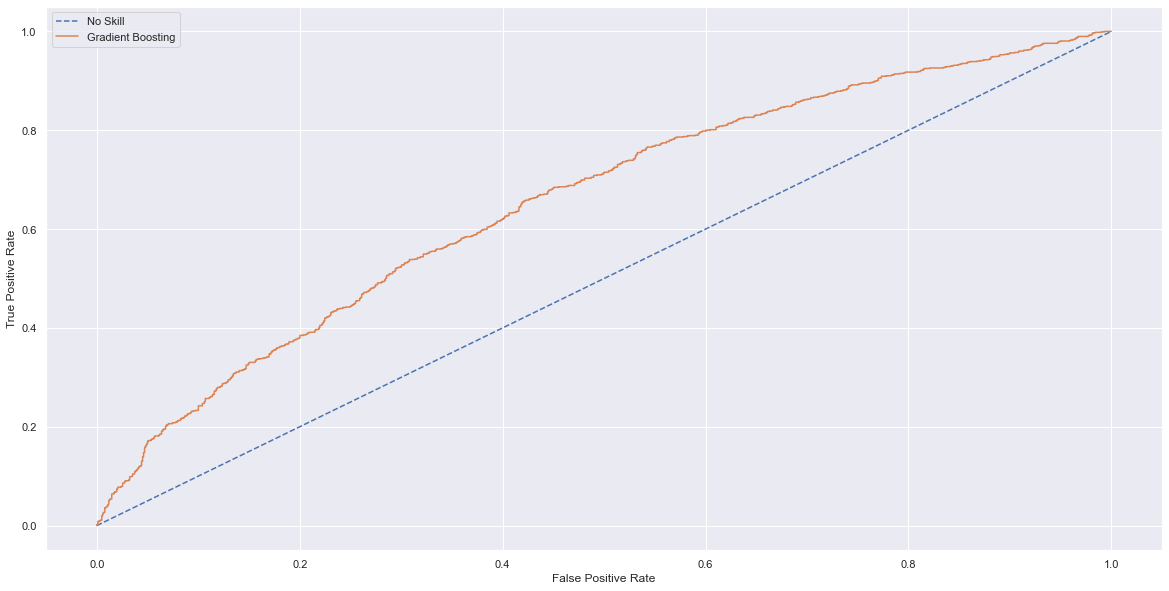

In [90]:
# Generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(Y_test))]
gb_probs = gb.predict_proba(X_test)
# Keep probabilities for the positive outcome only
gb_probs = gb_probs[:, 1]
# Calculate scores
ns_auc = roc_auc_score(Y_test, ns_probs)
gb_auc = roc_auc_score(Y_test, gb_probs)
# Summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Gradient Boosting: ROC AUC=%.3f' % (gb_auc))
# Calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
gb_fpr, gb_tpr, _ = roc_curve(Y_test, gb_probs)
# Plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(gb_fpr, gb_tpr, label='Gradient Boosting')
# Axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# Show the legend
pyplot.legend()
# Show the plot
pyplot.show()

In [91]:
# Confusion matrix with the best model
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)
print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(Y_test,Y_pred))
Y_test.value_counts()

Confusion matrix: 
 [[675 344]
 [552 529]]
Classification report: 
               precision    recall  f1-score   support

           0       0.55      0.66      0.60      1019
           1       0.61      0.49      0.54      1081

    accuracy                           0.57      2100
   macro avg       0.58      0.58      0.57      2100
weighted avg       0.58      0.57      0.57      2100



1    1081
0    1019
Name: Accident_Severity_Flag, dtype: int64

# Permutation Test

In [92]:
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn import datasets
from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence
from sklearn.inspection import permutation_importance

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [93]:
# Use RandomForestClassifer model to do the permuattion test 
# RFC is better for permutation test 
clf_models = []
clf_models.append(('RF', RandomForestClassifier()))
for name, model in clf_models:
  exec(f'clf_{name} = model.fit(X_train, Y_train)')
  msg = "Model: clf_%s , Score:%.2f" % (name, model.score(X_train, Y_train))
  print(msg)
  print(confusion_matrix(Y_test, model.predict(X_test)))
  print('')

Model: clf_RF , Score:1.00
[[637 382]
 [486 595]]



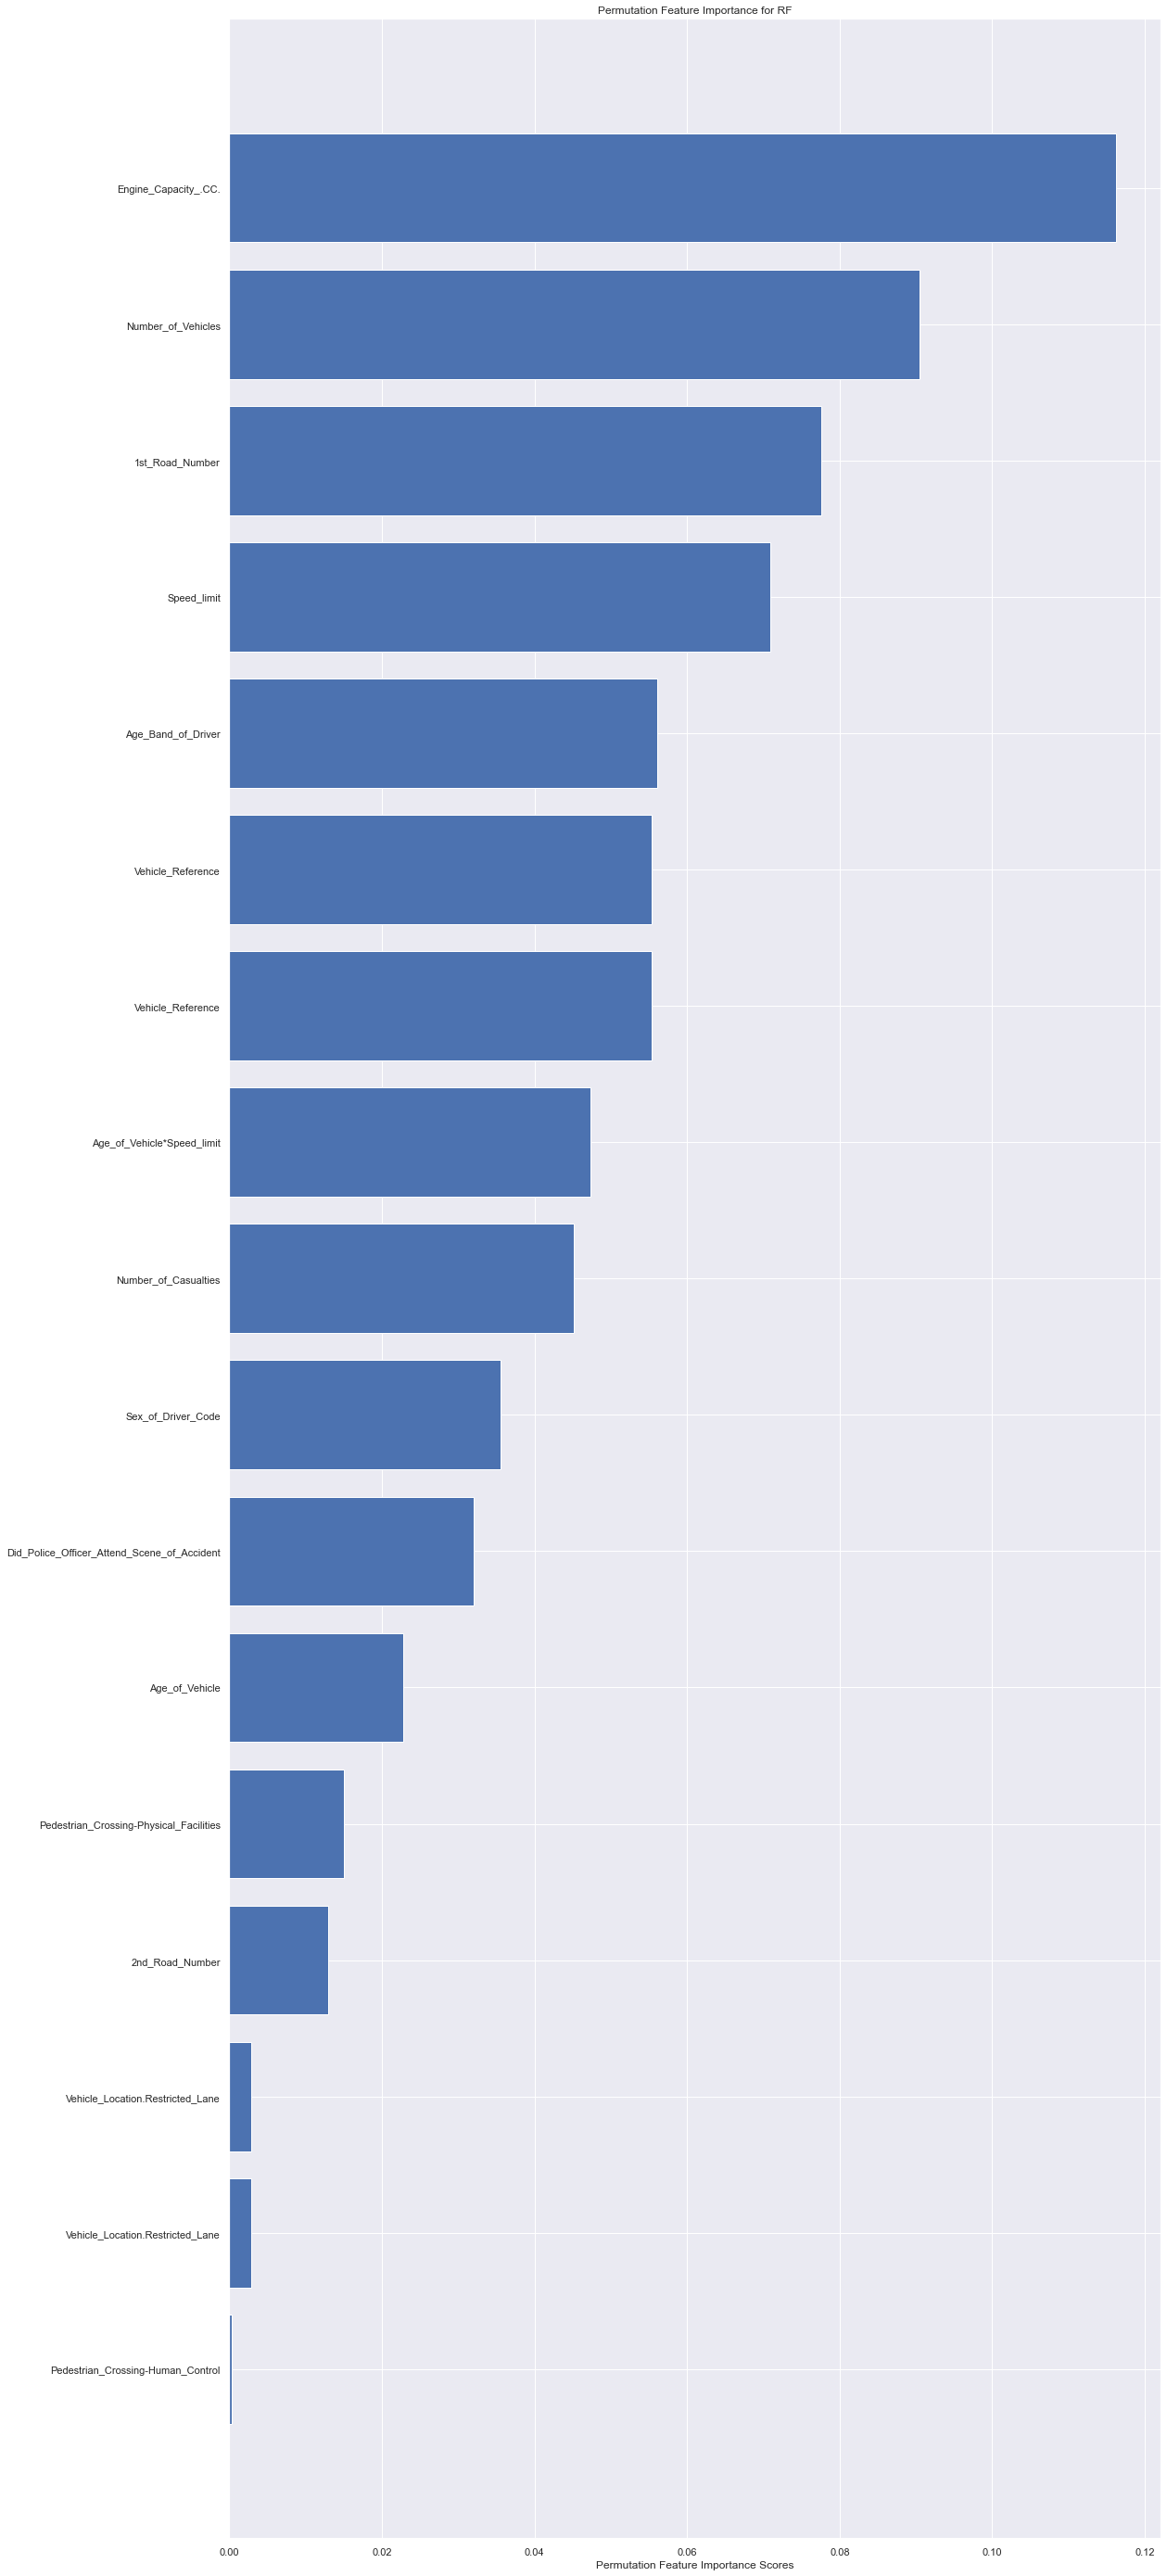

In [94]:
for name, model in clf_models:
  # Perform permutation importance
  results = permutation_importance(model, X, Y, scoring='accuracy')
  # Get importance
  importance = results.importances_mean
  sorted_idx = np.argsort(importance)
  pos = np.arange(sorted_idx.shape[0]) + .5
  plt.subplots(figsize=(18,50))
  plt.barh(pos, importance[sorted_idx], align='center')
  plt.yticks(pos, X.columns[sorted_idx])
  plt.xlabel('Permutation Feature Importance Scores')
  plt.title('Permutation Feature Importance for %s' % name)
  plt.show()

In [ ]:
print("Gradient Boosting scores")
model_results = pd.DataFrame({'Model': ['Gradient Boosting_1'], 'Score': [acc_gb]})
model_results.sort_values(by='Score', ascending=False)